# Model load

GemPy save functionalities provides the option to compress the exported results in zip archives. Archived, the models take less space, and they further can be stored in a more structured way.

In [1]:
# import libraries
import gempy as gp

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Loading a model is quite similar to creating a model object and adding data. Just that this extra information (grid resolution and extent, surface to stack mapping, fault declaration ...) is stored in the saved model files. 
You simply use `gp.load_model` and give the complete path towards the .zip archive. Let's, for instance, load the Alès model from Elisa Heim:

In [2]:
geo_model = gp.load_model(name='Alesmodel', path='../model_data/Alesmodel.zip')

is path ../model_data/Alesmodel
Active grids: ['regular']
Active grids: ['regular' 'topography']


Looking at the data and grids, we see, that there is topography and already data assigned to surfaces and stacks:

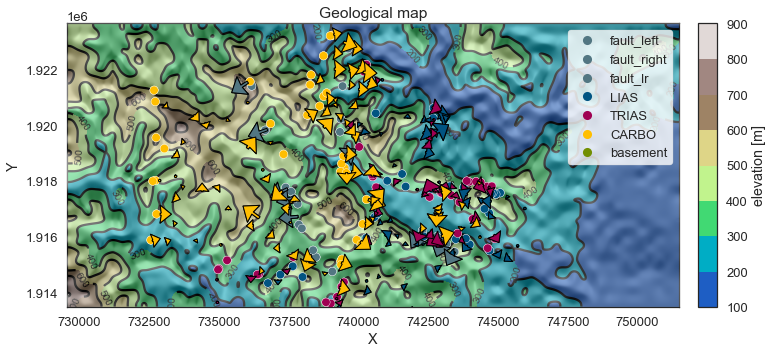

In [6]:
gp.plot_2d(geo_model, section_names='topography', show_topography=True);

In [7]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,fault_left,fault_left,1,#527682,1
2,fault_right,fault_right,1,#527682,2
1,fault_lr,fault_lr,1,#527682,3
4,LIAS,Trias_Series,1,#015482,4
3,TRIAS,Trias_Series,2,#9f0052,5
5,CARBO,Carbon_Series,1,#ffbe00,6
6,basement,Basement_Series,1,#728f02,7


The model is not yet computed, and normally loaded models have to be re-computed. So we need to set up the interpolator and compute the solution:

In [9]:
gp.set_interpolator(geo_model)

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  3
Compilation Done!
Kriging values: 
                              values
range                  24322.520429
$C_o$               14085357.142857
drift equations  [3, 3, 3, 3, 3, 3]


In [10]:
sol = gp.compute_model(geo_model)

C:\Users\Simon\Anaconda3\envs\gempy_env_py38\lib\site-packages\gempy\core\solution.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.geological_map = np.array(


C:\Users\Simon\Anaconda3\envs\gempy_env_py38\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


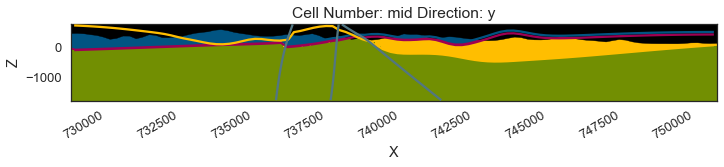

In [14]:
gp.plot_2d(geo_model, show_data=False, show_topography=True);

C:\Users\Simon\Anaconda3\envs\gempy_env_py38\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


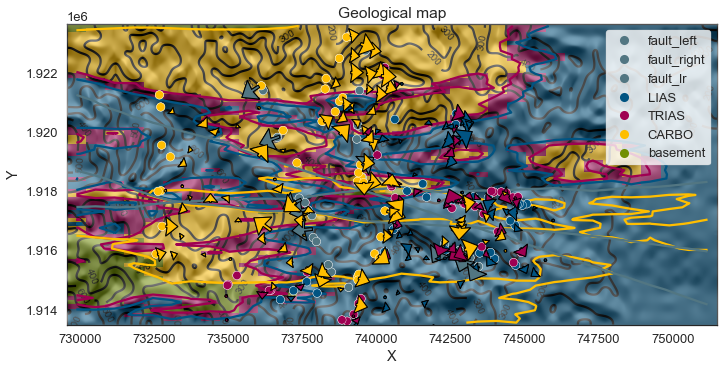

In [15]:
gp.plot_2d(geo_model, section_names='topography', show_topography=True)